In [2]:
# Kali ini kita akan belajar tentang kmeans clustering
# fungsinya adalah untuk mengklasifikasikan kelompok data nya
# pertama kita import dulu library nya

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Sekarang kita impor dataset
df = pd.read_csv("customermall.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


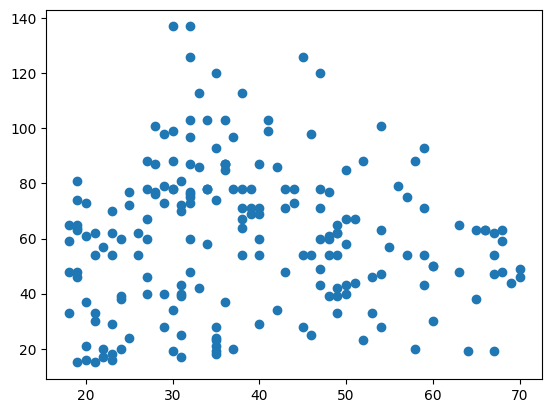

In [3]:
# kita visualisasikan datanya
plt.scatter(df["Age"], df["Annual Income (k$)"])

In [4]:
# kita buat model machine learning
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
# kita buang kolom yang menurut kita tidak penting
df =  df.drop(["Spending Score (1-100)"], axis="columns")
df

,CustomerID,Genre,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

y_predicted = km.fit_predict(df[['Age','Annual Income (k$)']])
y_predicted

df["cluster"] = y_predicted

df

C:\Users\Ryan Akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan Akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ryan Akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,CustomerID,Genre,Age,Annual Income (k$),cluster
0,1,Male,0.019231,0.000000,1
1,2,Male,0.057692,0.000000,1
2,3,Female,0.038462,0.008197,1
3,4,Female,0.096154,0.008197,1
4,5,Female,0.250000,0.016393,1
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0
196,197,Female,0.519231,0.909836,0
197,198,Male,0.269231,0.909836,0
198,199,Male,0.269231,1.000000,0


In [7]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Pada K-Means: Label dibuat oleh komputer untuk kita (sebagai pengelompok).

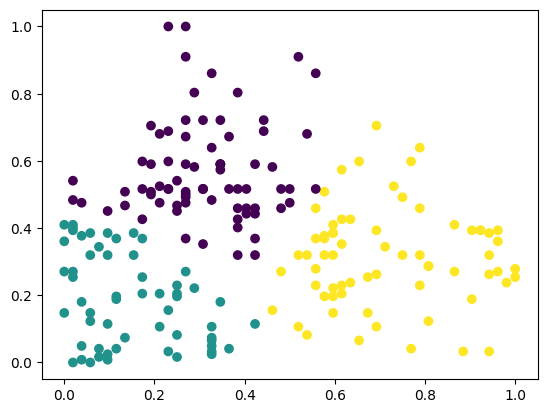

In [8]:
x = df["Age"]
y = df["Annual Income (k$)"]
label = km.labels_
plt.scatter(x, y, c=label)